## Virtual Environment for Individual-Based Modeling

### Advanced Project I

Created on March 31, 2019 by Ralph Florent <r.florent@jacobs-university.de>

#### Description
WIP...

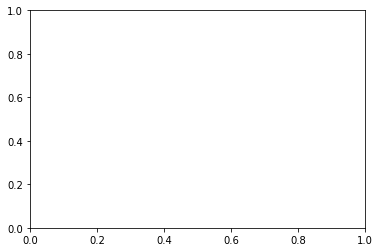

In [8]:
""" Individual-Based Modeling """

# -*- coding: utf-8 -*-
# 
# Created on March 31, 2019
# Authors: 
#        Ralph Florent <r.florent@jacobs-university.de>

### START: scripts

# Import relevant libraries

import numpy as np # array calculator
import imageio as gm # gif maker
import matplotlib.pyplot as plt # plotter
import matplotlib.patches as Patches
from matplotlib.path import Path 


TOTAL_AGENTS = 30 # Seabirds 
FILEPATH = '../../dist/'
path = FILEPATH + 'frame/'
images = [] # images to become gif
t = 0


def create_patches():
    """ Create a set of patches within a specific area 
    ref: https://matplotlib.org/users/path_tutorial.html
    """
    global patches 
    patches = []
    
    rects = [
        [(0.10, 0.20), (0.10, 0.40), (0.40, 0.40), (0.40, 0.20), (0.10, 0.40)],
        [(0.60, 0.05), (0.60, 0.25), (0.70, 0.25), (0.70, 0.05), (0.60, 0.05)],
        [(0.37, 0.51), (0.37, 0.86), (0.79, 0.86), (0.79, 0.51), (0.37, 0.51)],
    ]
    codes = [
        Path.MOVETO, # start here
        Path.LINETO, # draw lines
        Path.LINETO, # ~
        Path.LINETO, # draw lines
        Path.CLOSEPOLY,# finish here
    ]
    
    for rect in rects:
        path = Path(rect, codes)
        patch = Patches.PathPatch(path, alpha=0.5, lw=2)
        patches.append(patch)
    
    return patches


def is_in_patch(patch, point=()):
    """ Check if a point belongs to a specific area (or patch)"""
    path = patch.get_path()
    return path.contains_point(point)


def gen_random_point():
    global patches
    # initialize random point(x, y)
    x, y = np.random.rand(2) # [0-1, 0-1]
        
    while True:
        found = False
        for p in patches:
            if is_in_patch(p, (x, y)):
                found = True
        
        if not found: break # ice breaker
        
        # update point(x, y)
        x, y = np.random.rand(2)
            
    return (x, y)


# On-the-fly agent definition
class Agent:
    pass


# create agents
def create_agents():
    global agents
    agents = []
    
    for i in range(TOTAL_AGENTS):
        agent = Agent()
        x, y = gen_random_point() # that is not in patch
        agent.x = x
        agent.y = y
        agent.type = 'seabird-a'
        agents.append(agent) # append (i.e. add) the ith agent into the array ’agents’
    return agents


def initialize():
    create_patches()
    create_agents()

    
def observe():
    """ Create and plot figure """
    global patches
    global agents
    plt.cla()
   
    fig = plt.figure(figsize=(11, 6.5)) # define figure size 11x6.5 inches
    ax  = fig.add_subplot(111)
    
    for p in patches:
        ax.add_patch(p) # add artists to display rectangles
    
    # add agents' position
    ax.plot([ag.x for ag in agents], [ag.y for ag in agents], 'o', mfc='w', mec='k')
    
    # additional settings for the graph
    plt.axis('image')
    plt.axis([0, 1, 0, 1])
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel('Time ' + str(int(t)), fontsize=15) # Identify which image is plotted
    plt.title('Virtual Environment', fontsize=15) # Title the graph
    
    image_path = path + str(int(t)) + '.png'
    plt.savefig(image_path, bbox_inches='tight', pad_inches=0)
    plt.close(fig)
    
     # storing image for final gif
    image = gm.imread(image_path)
    images.append(image)


def update():
    create_patches() # Cannot put single artist in more than one figure
    global agents
    for ag in agents:
        ag.x, ag.y = gen_random_point()


plt.ioff() # turn off interactive plotting mode
# first time
initialize()
observe()

# loop over t-1 time
for t in range(1, 20):
    update()
    observe()

# create final gif
gm.mimsave(FILEPATH + 'image.gif', images)
### END: scripts